✅ Model loaded successfully!
Class Labels: ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_healthy']
🔍 Sample image path: ../data/processed/test\Tomato_Bacterial_spot\0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


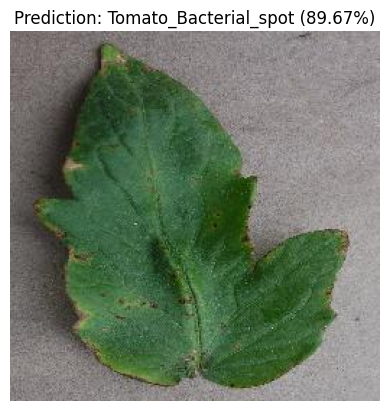

FileUpload(value=(), accept='image/*', description='Upload')

In [1]:
# 📙 notebooks/03_inference.ipynb

# --- 1. Imports ---
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

# --- 2. Paths ---
MODEL_PATH = "../models/best_model.h5"
DATA_PATH = "../data/processed/test"  # You can change this to any folder with leaf images

# --- 3. Load Model ---
model = load_model(MODEL_PATH)
print("✅ Model loaded successfully!")

# --- 4. Define Class Labels ---
# These should match your training dataset folder names
labels = sorted(os.listdir(DATA_PATH))
print("Class Labels:", labels)

# --- 5. Prediction Function ---
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_array)[0]
    index = np.argmax(preds)
    label = labels[index]
    confidence = preds[index]

    # Display Image
    plt.imshow(Image.open(img_path))
    plt.axis("off")
    plt.title(f"Prediction: {label} ({confidence*100:.2f}%)")
    plt.show()

    return label, confidence

# --- 6. Single Image Prediction Demo ---
sample_dir = os.path.join(DATA_PATH, labels[0])  # Pick the first class folder
sample_img = os.path.join(sample_dir, os.listdir(sample_dir)[0])

print("🔍 Sample image path:", sample_img)
predict_image(sample_img)

# --- 7. Interactive Image Uploader ---
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

def on_upload_change(change):
    for file_name, file_info in uploader.value.items():
        with open(file_name, 'wb') as f:
            f.write(file_info['content'])
        print(f"\n📁 Uploaded File: {file_name}")
        predict_image(file_name)

uploader.observe(on_upload_change, names='value')
